# Multi-Armed Bandits
We want to solve the explore-exploit dilemma, we want to play sub-optimal machines only the least amount of time possible and play the optimal machine the more time possible.

# Epsilon-Greedy
We choose an epsilon (5%-10%) that is the probability to explore a random machine. So every time we have a probability of exploration, but even when we find the optimal machine we continue to explore sub-optimal solutions, so we need to set epsilon to zero.<br>
We want to keep track and update the sample mean, we use the previous mean and update it with the last sample.

## Compare different epsilons

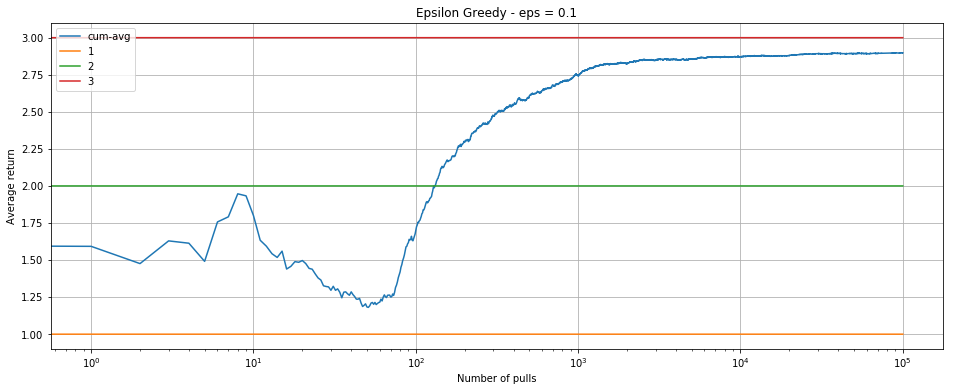

Bandit 0 mean: 1.0129082100860884
Bandit 1 mean: 1.9915984548784265
Bandit 2 mean: 2.99997897918457


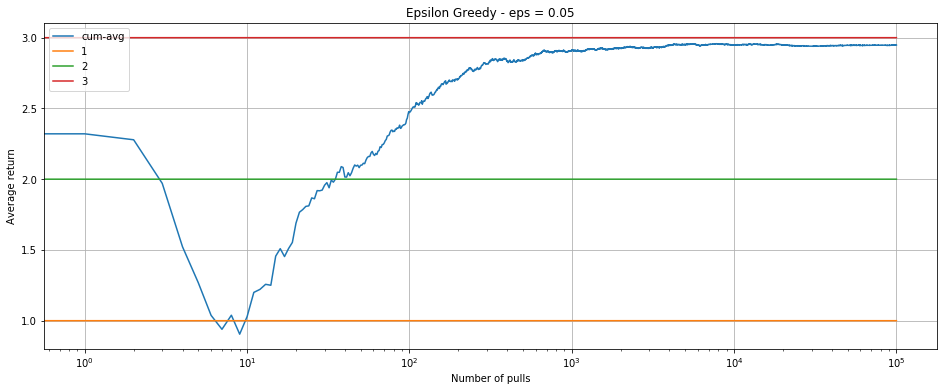

Bandit 0 mean: 1.0009661360550057
Bandit 1 mean: 2.0491614758126144
Bandit 2 mean: 2.997827686851144


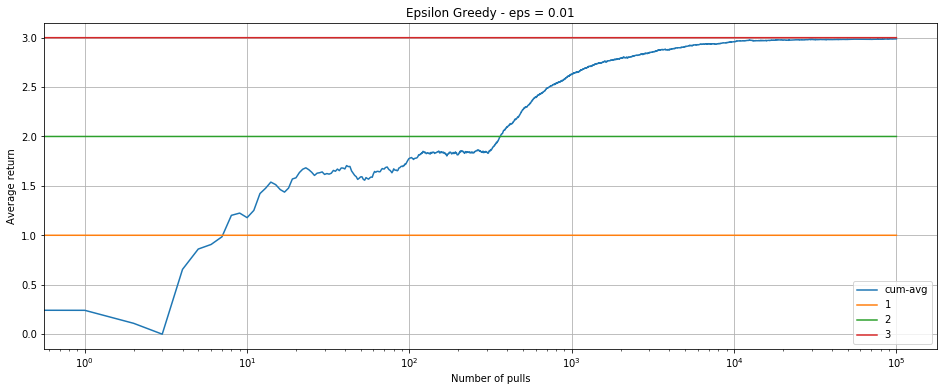

Bandit 0 mean: 1.0765427833945587
Bandit 1 mean: 1.9715372329304206
Bandit 2 mean: 3.0012623834307277


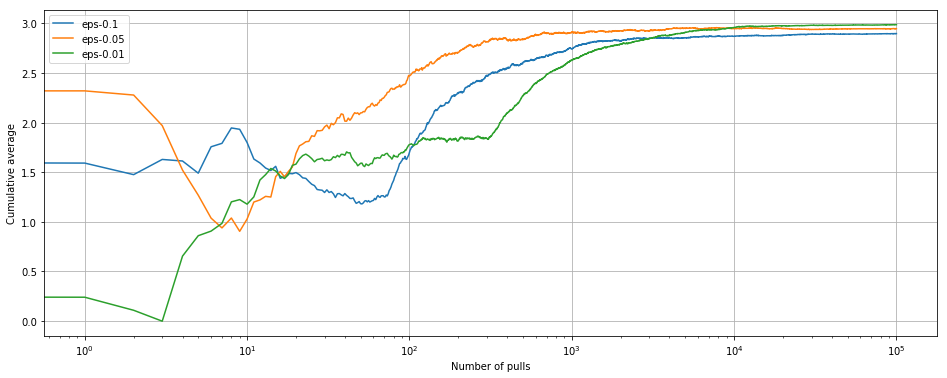

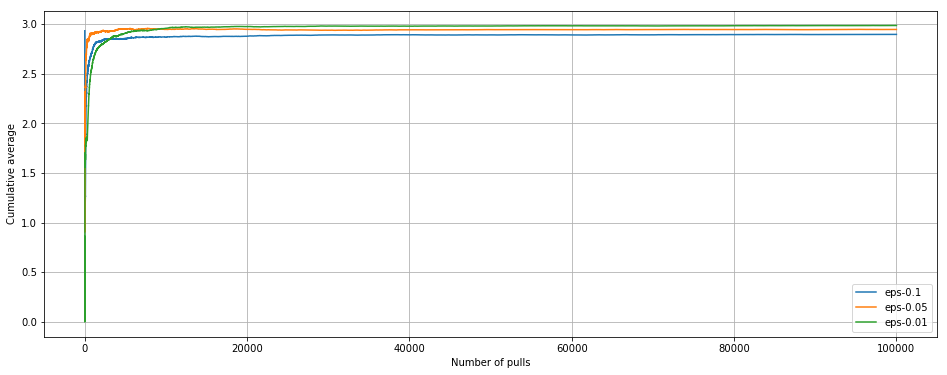

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['axes.grid'] = True

class Bandit:
    def __init__(self, m):
        self.actual_mean = m
        self.mean = 0
        self.N = 0
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1/self.N) * self.mean + 1/self.N * x
        
    def pull(self):
        return np.random.randn() + self.actual_mean

def run_experiment(means, eps, N):
    bandits = [Bandit(i) for i in means]
    data = np.empty(N)
    for i in range(N):
        r = np.random.random()
        if r < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.title('Epsilon Greedy - eps = {}'.format(eps))
    plt.plot(cumulative_average, label = 'cum-avg')
    for m in means:
        plt.plot([m] * N, label = str(m))
    plt.legend(loc = 'best')
    plt.xlabel('Number of pulls')
    plt.ylabel('Average return')
    plt.xscale('log')
    plt.show()

    for i in range(len(bandits)):
        print('Bandit {} mean: {}'.format(i, bandits[i].mean))
    return cumulative_average

means = [1, 2, 3]
epsilons = [0.1, 0.05, 0.01]
N = 100000
cum_avgs = [run_experiment(means, eps, N) for eps in epsilons]

# log plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = 'eps-{}'.format(epsilons[i]))
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

# linear plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = 'eps-{}'.format(epsilons[i]))
plt.legend(loc = 'best')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

# Optimistic Initial Values
We initialise the mean of the bandits with a value higher than the actual mean (optimistic value), and then we exploit the best machine. By exploiting the best machine we reduce the estimated means with the samples, so the estimated means will converge to the actual means.<br>
The advantage w.r.t. the epsilon-greedy strategy is that in the long run we don't explore anymore the sub-optimal machine but we only exploit the optimal one.

## Compare epsilon-greedy to optimistic initial values strategy

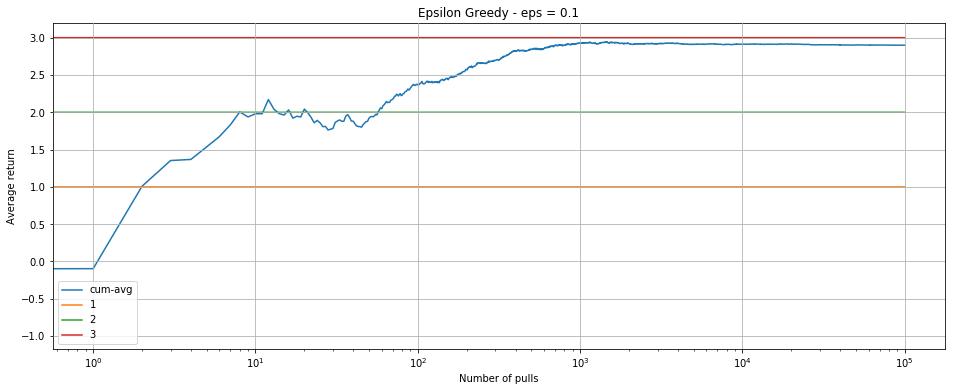

Bandit 0 mean: 1.0087548815989598
Bandit 1 mean: 1.9981347320751008
Bandit 2 mean: 2.997911300971167


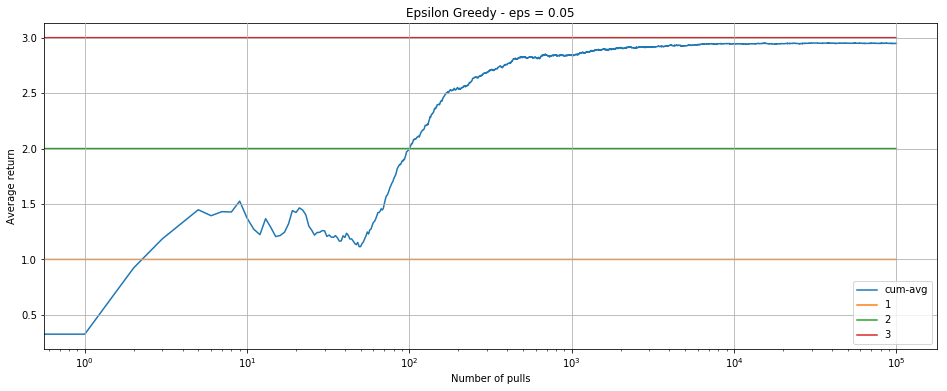

Bandit 0 mean: 0.9787606951251652
Bandit 1 mean: 1.9828209641456682
Bandit 2 mean: 2.998699621350099


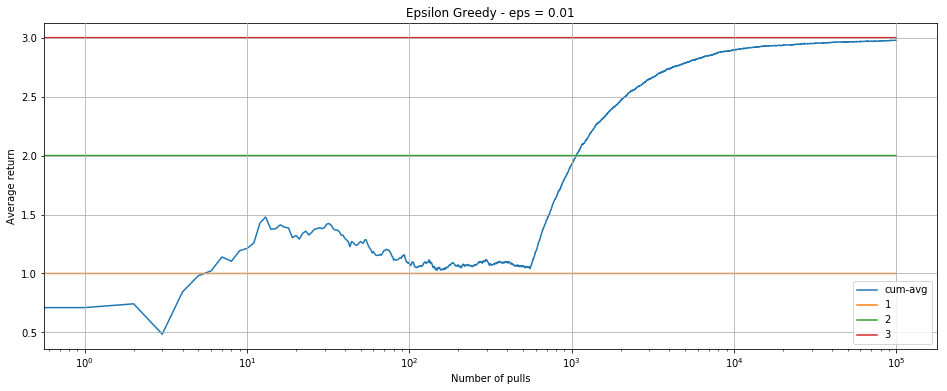

Bandit 0 mean: 1.0544214081538874
Bandit 1 mean: 1.9768524235003428
Bandit 2 mean: 2.9989544747948744


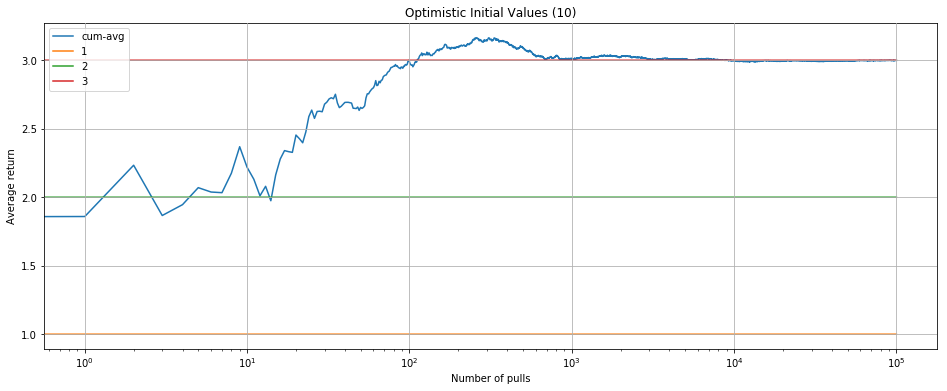

Bandit 0 mean: 2.9757742561464444
Bandit 1 mean: 2.882717776778384
Bandit 2 mean: 2.9985469333061765


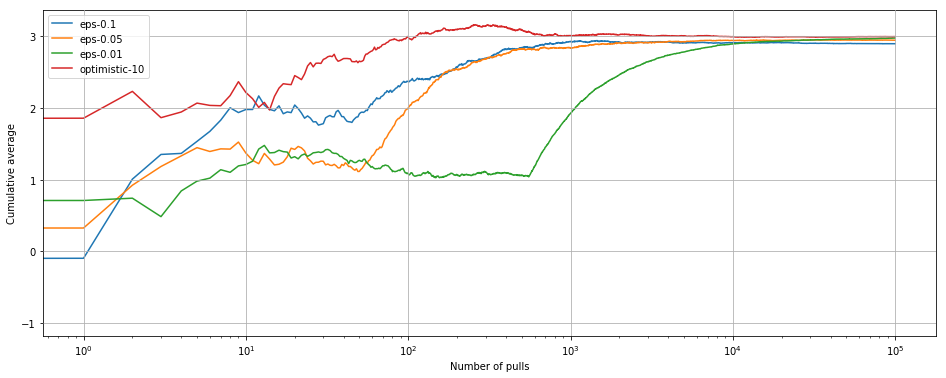

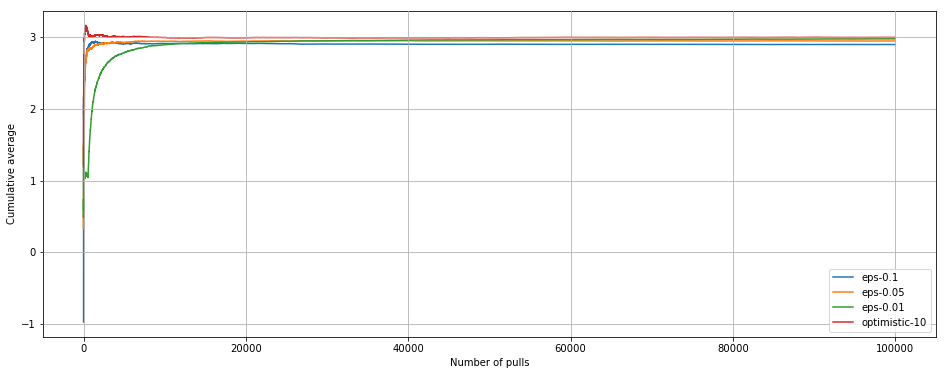

In [28]:
class BanditInitialValues:
    def __init__(self, m, upper_limit):
        self.actual_mean = m
        self.mean = upper_limit
        self.N = 1
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1/self.N) * self.mean + 1/self.N * x
        
    def pull(self):
        return np.random.randn() + self.actual_mean

def run_experiment_optimistic(means, upper_limit, N):
    bandits = [BanditInitialValues(i, upper_limit) for i in means]
    data = np.empty(N)
    for i in range(N):
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.title('Optimistic Initial Values ({})'.format(upper_limit))
    plt.plot(cumulative_average, label = 'cum-avg')
    for m in means:
        plt.plot([m] * N, label = str(m))
    plt.legend(loc = 'best')
    plt.xlabel('Number of pulls')
    plt.ylabel('Average return')
    plt.xscale('log')
    plt.show()

    for i in range(len(bandits)):
        print('Bandit {} mean: {}'.format(i, bandits[i].mean))
    return cumulative_average

means = [1, 2, 3]
epsilons = [0.1, 0.05, 0.01]
N = 100000
upper_limit = 10
labels = ['eps-{}'.format(i) for i in epsilons] + ['optimistic-{}'.format(upper_limit)]
cum_avgs = [run_experiment(means, eps, N) for eps in epsilons]
cum_avgs.append(run_experiment_optimistic(means, upper_limit, N))

# log plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = labels[i])
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

# linear plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = labels[i])
plt.legend(loc = 'best')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

## Results
Optimistic initial values behaves better because in the long run it eploits only the optimal machine, while the epsilon greedy startegy keeps exploring sub-optimal machines

# Upper Confidence Bound - UCB1
It's similar to the Optimistic Initial Values because is greedy, the difference is that we don't take the maximum sample mean but the maximum Upper Confidence Bound. In the long run the confidence bounds shrink and we'll select only the optimal machine.

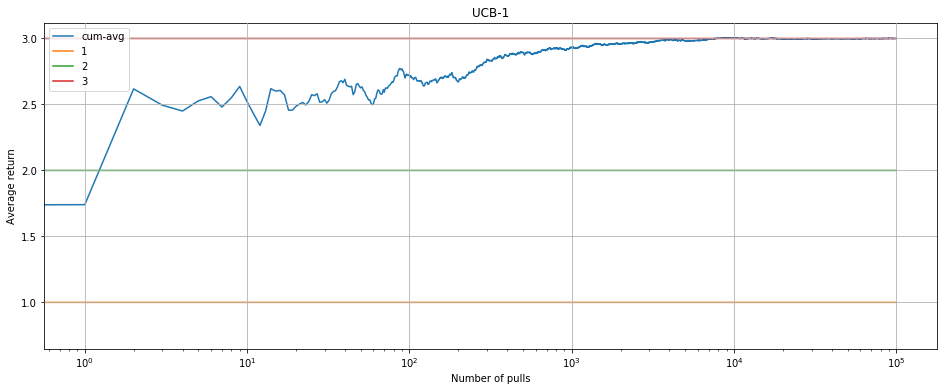

Bandit 0 mean: 0.8414175161010286
Bandit 1 mean: 2.148390813009945
Bandit 2 mean: 3.0000754438815904


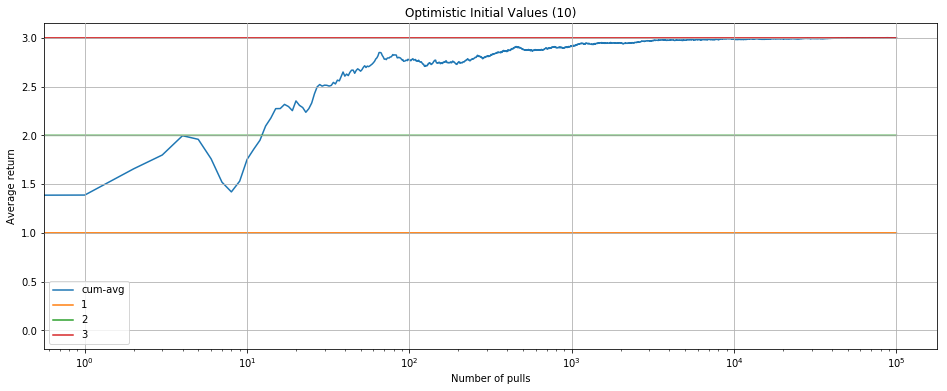

Bandit 0 mean: 2.7299269460582614
Bandit 1 mean: 2.806152793153938
Bandit 2 mean: 2.9994653192927534


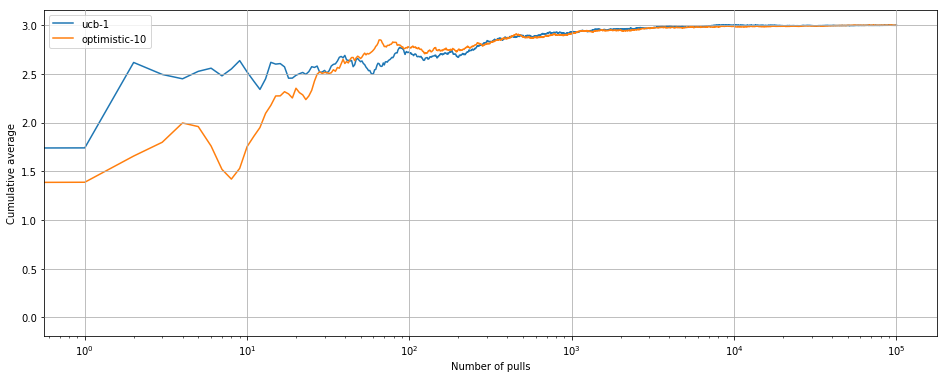

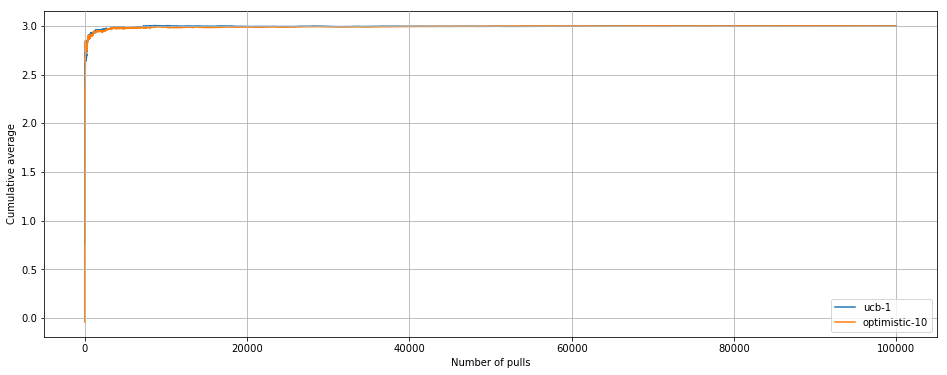

In [29]:
class BanditUCB:
    def __init__(self, m):
        self.actual_mean = m
        self.mean = 0
        self.N = 0
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1/self.N) * self.mean + 1/self.N * x
        
    def pull(self):
        return np.random.randn() + self.actual_mean

def run_experiment_ucb(means, N):
    bandits = [BanditUCB(i) for i in means]
    data = np.empty(N)
    for i in range(N):
        j = np.argmax([np.inf if b.N == 0 else (b.mean + np.sqrt(2 * np.log(N+1) / (b.N))) for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.title('UCB-1')
    plt.plot(cumulative_average, label = 'cum-avg')
    for m in means:
        plt.plot([m] * N, label = str(m))
    plt.legend(loc = 'best')
    plt.xlabel('Number of pulls')
    plt.ylabel('Average return')
    plt.xscale('log')
    plt.show()

    for i in range(len(bandits)):
        print('Bandit {} mean: {}'.format(i, bandits[i].mean))
    return cumulative_average

means = [1, 2, 3]
N = 100000
upper_limit = 10
labels = ['ucb-1'] + ['optimistic-{}'.format(upper_limit)]
cum_avgs = [run_experiment_ucb(means, N)]
cum_avgs.append(run_experiment_optimistic(means, upper_limit, N))

# log plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = labels[i])
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

# linear plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = labels[i])
plt.legend(loc = 'best')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

%%latex
# Bayesian / Thompson Sampling
For the Central Limit Theorem the estimated expected value $\overline{X}$ of a normal variable X is a normal distribution with mean equals to the $\mu$ and the standard deviation divided by N (#samples).
$$X \sim N(\mu, \sigma)$$
$$\overline{X} \sim N(\mu, \frac{\sigma}{N})$$

# Comparing Decaying Epsilon-Greedy, Optimistic Initial Values, UCB1 and Thompson Sampling

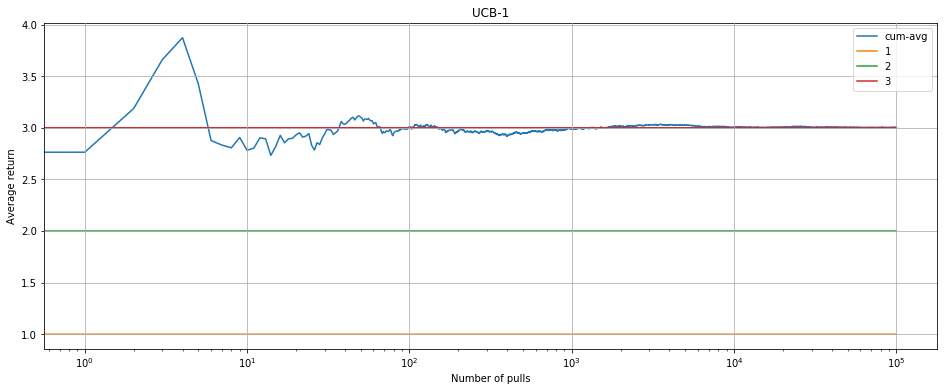

Bandit 0 mean: 0.8452567214316362
Bandit 1 mean: 1.7167122691594905
Bandit 2 mean: 3.003765906996113


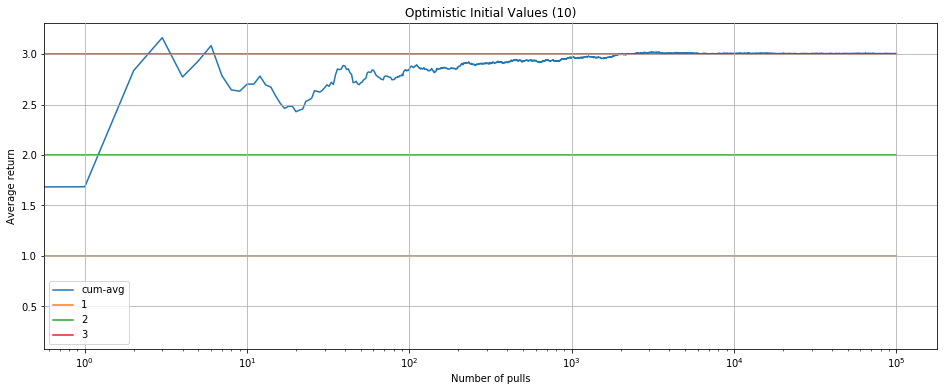

Bandit 0 mean: 2.4376220291708544
Bandit 1 mean: 2.902993780589574
Bandit 2 mean: 3.00490736743878


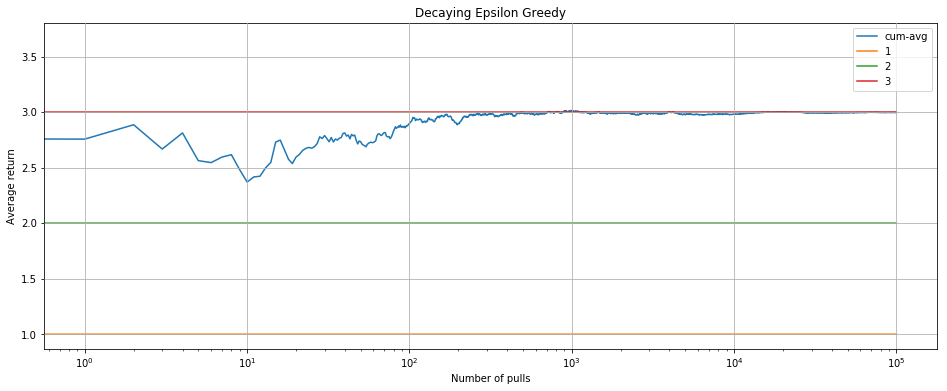

Bandit 0 mean: 1.1126297081944654
Bandit 1 mean: 2.2937694932619466
Bandit 2 mean: 2.9963040269677337


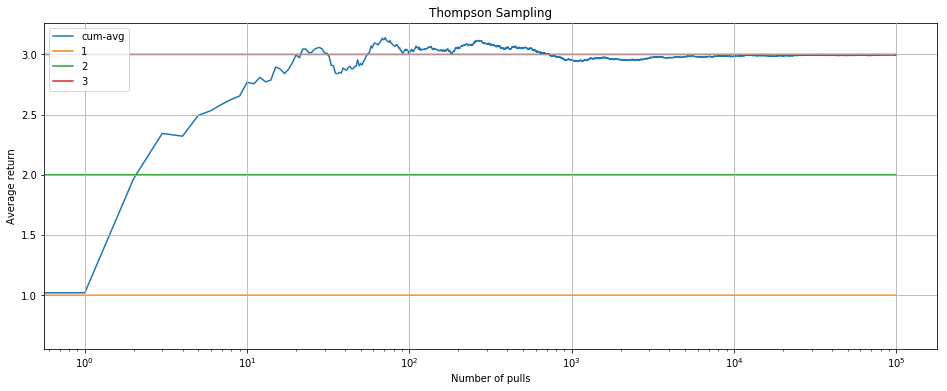

Bandit 0 mean: 0.11863531262623567
Bandit 1 mean: 2.253420924261904
Bandit 2 mean: 2.9911638012928785


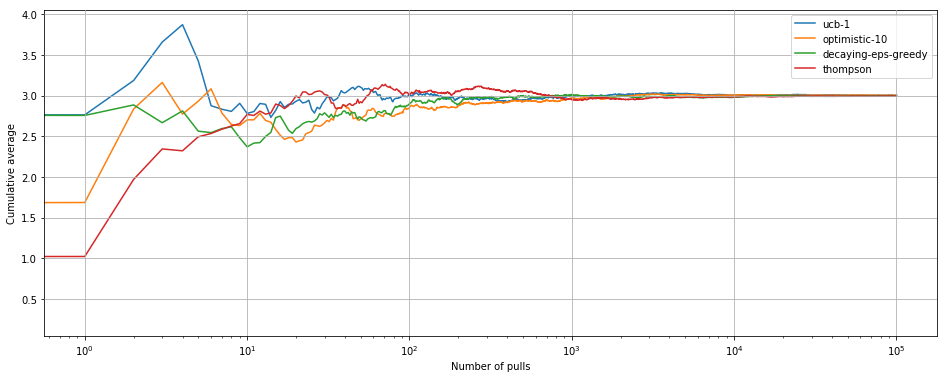

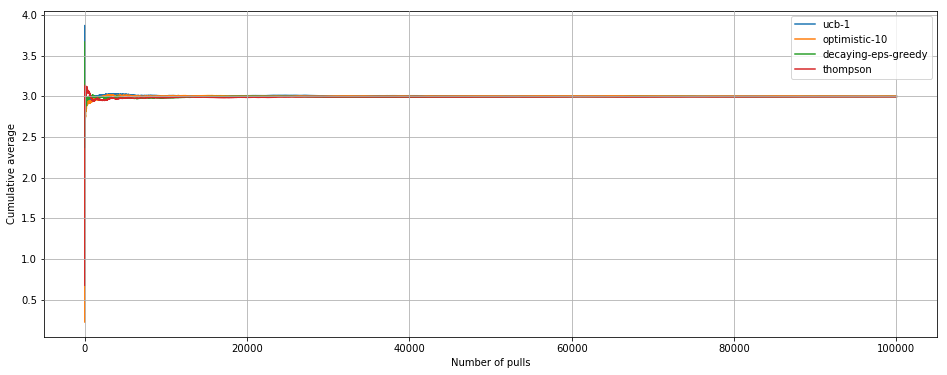

In [35]:
class BanditThompson:
    def __init__(self, mean):
        self.m = mean
        self.m0 = 0
        self.lambda0 = 1
        self.sum_x = 0
        self.tau = 1
    
    def pull(self):
        return np.random.randn() + self.m
    
    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda0) + self.m0
    
    def update(self, x):
        self.lambda0 += 1
        self.sum_x += x
        self.m0 = self.tau * self.sum_x / self.lambda0
        
def run_experiment_thompson(means, N):
    bandits = [BanditThompson(i) for i in means]
    data = np.empty(N)
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.title('Thompson Sampling')
    plt.plot(cumulative_average, label = 'cum-avg')
    for m in means:
        plt.plot([m] * N, label = str(m))
    plt.legend(loc = 'best')
    plt.xlabel('Number of pulls')
    plt.ylabel('Average return')
    plt.xscale('log')
    plt.show()

    for i in range(len(bandits)):
        print('Bandit {} mean: {}'.format(i, bandits[i].sample()))
    return cumulative_average

def run_experiment_decaying_eps(means, N):
    bandits = [Bandit(i) for i in means]
    data = np.empty(N)
    for i in range(N):
        r = np.random.random()
        if r < 1 / (i + 1):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.title('Decaying Epsilon Greedy')
    plt.plot(cumulative_average, label = 'cum-avg')
    for m in means:
        plt.plot([m] * N, label = str(m))
    plt.legend(loc = 'best')
    plt.xlabel('Number of pulls')
    plt.ylabel('Average return')
    plt.xscale('log')
    plt.show()

    for i in range(len(bandits)):
        print('Bandit {} mean: {}'.format(i, bandits[i].mean))
    return cumulative_average

means = [1, 2, 3]
N = 100000
upper_limit = 10
labels = ['ucb-1', 'optimistic-{}'.format(upper_limit), 'decaying-eps-greedy', 'thompson']
cum_avgs = [run_experiment_ucb(means, N)]
cum_avgs.append(run_experiment_optimistic(means, upper_limit, N))
cum_avgs.append(run_experiment_decaying_eps(means, N))
cum_avgs.append(run_experiment_thompson(means, N))

# log plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = labels[i])
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

# linear plot
for i in range(len(cum_avgs)):
    plt.plot(cum_avgs[i], label = labels[i])
plt.legend(loc = 'best')
plt.xlabel('Number of pulls')
plt.ylabel('Cumulative average')
plt.show()

# Non-stationary Bandits
For non-stationary bandits we can use a constant learning rate, because we don't want to keep track of all the past values, but only the most recent ones. For non-stationary problems we don't want that Q converges, so $\alpha$ can be constant.
$$ Q_t = (1 - \alpha) Q_{t-1} + \alpha X_t$$